In [1]:
import numpy as np
import pandas as pd 
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import thinkstats2
import thinkplot

pd.options.display.float_format = '{:.2f}'.format # change the display format of numbers

In [2]:
saffronart_df = pd.read_csv('saffronart_dataset.csv') 

# change the dates to Pandas datetime objects:
saffronart_df['auction_date'] = pd.to_datetime(saffronart_df['auction_date'])
saffronart_df['birth_date'] = pd.to_datetime(saffronart_df['birth_date'])
saffronart_df['death_date'] = pd.to_datetime(saffronart_df['death_date'])

saffronart_df.head(5)

,artist,birth_date,birth_place,death_date,artist_age,title,winning_bid,low_est,high_est,auction_date,category,style,size,medium
0,akhilesh,1956-01-01,Indore,NaT,63.00,Divine Conversation,9000.00,5000.00,7000.00,2019-06-01,painting,abstract,71.5 x 71.5 in,acrylic on canvas
1,akhilesh,1956-01-01,Indore,NaT,63.00,In search of Untitled forms -II,1120.00,5000.00,6670.00,2013-11-01,painting,abstract,32.5 x 44 in,acrylic on canvas
2,akhilesh,1956-01-01,Indore,NaT,63.00,In Search of Untitled Lines,6186.00,6900.00,8625.00,2013-08-01,painting,NaN,47 x 47 in,acrylic on canvas
3,akhilesh,1956-01-01,Indore,NaT,63.00,Magadhi,2400.00,5770.00,7695.00,2013-02-01,painting,abstract,33 x 44.5 in,acrylic on canvas
4,akhilesh,1956-01-01,Indore,NaT,63.00,Untitled,2942.00,6735.00,8655.00,2013-02-01,painting,abstract,40 x 40 in,acrylic on canvas


# Distribution of art prices
## Histogram:

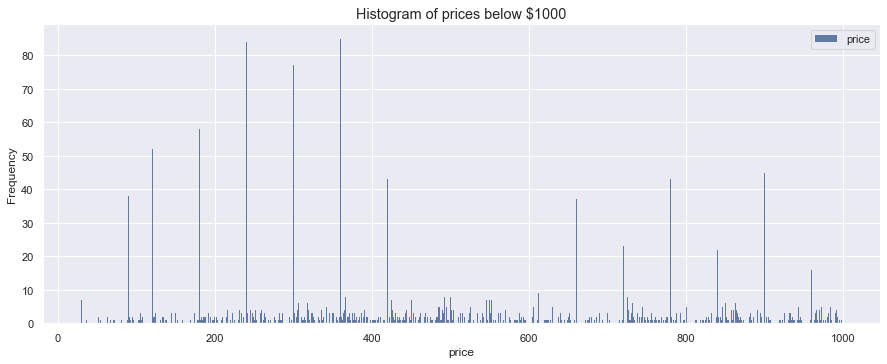

<Figure size 576x432 with 0 Axes>

In [3]:
# Histogram of prices below $1000:

low_price = saffronart_df[saffronart_df.winning_bid < 1000]
low_price_hist = thinkstats2.Hist(low_price.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.title('Histogram of prices below $1000', fontsize = 'x-large')

thinkplot.Hist(low_price_hist)
thinkplot.Show(xlabel='price', ylabel='Frequency')

**Comment:** The histogram above shows the distribution of prices below $1000. We can see that even within such a small interval, there're still so many random noises. Histogram, therefore, is not a good way of showing the overall distribution.

## Probability Mass Function (PMF):

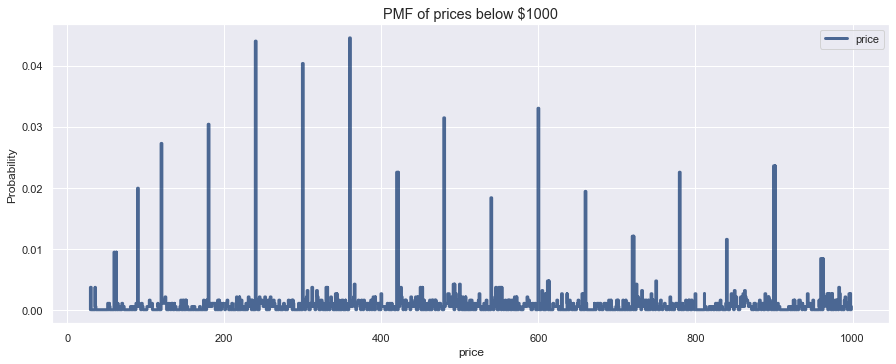

<Figure size 576x432 with 0 Axes>

In [4]:
# Probability Mass Function of prices below $1000:

low_price_pmf = thinkstats2.Pmf(low_price.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.title("PMF of prices below $1000", fontsize = 'x-large')

thinkplot.Pmf(low_price_pmf)
thinkplot.Show(xlabel='price', ylabel='Probability') 

**Comment:**
Another way of representing distributions is the Probability Mass Function (PMF). The graph above shows the distribution of prices below $\$1000$. Again, the problem of noises that we have with histogram shows up. This is because the only difference between a PMF and a histogram is that each value is mapped to its probability instead of its frequency: $probability = \frac{frequency}{sample\_size}$. However, we may still want to graph the PMF of all the prices to have some impression of the distribution. 

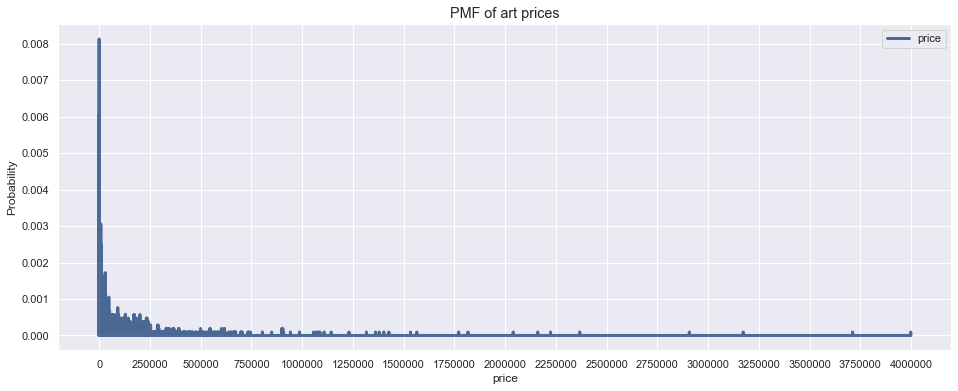

<Figure size 576x432 with 0 Axes>

In [5]:
# Probability Mass Function:
price_pmf = thinkstats2.Pmf(saffronart_df.winning_bid, label='price')

plt.figure(figsize = (16, 6))
plt.xticks([p for p in range(0, 4250000, 250000)])
plt.title("PMF of art prices", fontsize = 'x-large')

thinkplot.Pmf(price_pmf)
thinkplot.Show(xlabel='price', ylabel='Probability') 

**Comment:**
From the graph above, we see that the prices of most lots are below $ \$250,000 $. Because there're a lot of values, the Probability Mass Function (PMF) is not a good way to represent the distribution. A better option is the Cumulative Distribution Function (CDF).

## Cumulative Distribution Function (CDF):

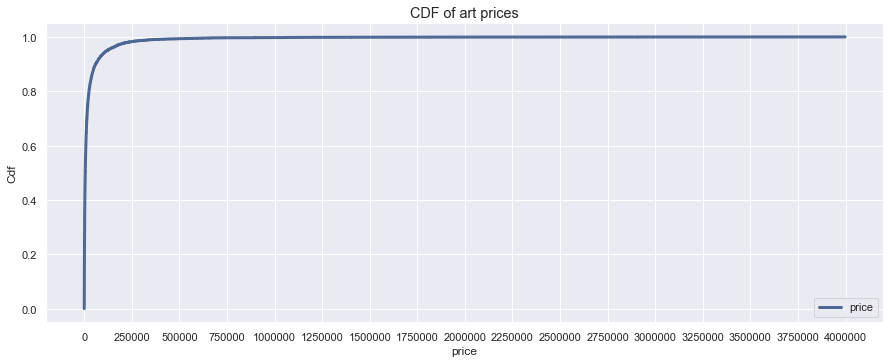

<Figure size 576x432 with 0 Axes>

In [6]:
# Cumulative Distribution Function:

price_cdf = thinkstats2.Cdf(saffronart_df.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.xticks([p for p in range(0, 4250000, 250000)])
plt.title("CDF of art prices", fontsize = 'x-large')

thinkplot.Cdf(price_cdf)
thinkplot.Show(xlabel='price', ylabel='Cdf') 

**Comment**:
The CDF confirms our observation that most lots are priced less than $250,000. Because there're many values and the range is vast, it makes the distribution almost a continuous one. This is reflected in the smoothness of the CDF. Before trying to find an analytic equation for the CDF, we compute some summary statistics first.  

In [7]:
# Summary Statistics:
print('Summary statistics of art prices:')

summary = saffronart_df.winning_bid.describe()
summary.rename({'50%': 'median'}, inplace=True)

mean_price = summary.loc['mean']
median_price = summary.loc['median']
price_std = summary.loc['std']

IQR = pd.Series(summary.loc['75%']-summary.loc['25%'], index=['interquartile range'])
summary.append(IQR)

Summary statistics of art prices:


count                   10456.00
mean                    28881.16
std                    115183.62
min                        30.00
25%                      1440.00
median                   5160.00
75%                     18121.00
max                   3998000.00
interquartile range     16681.00
dtype: float64

**Comment:**
It can be observed that the mean price is significantly greater than the median. This suggests that the distribution is skewed to the right. This effect is due to the presence of outliers (extremely high prices). For example, the highest price is nearly 4 million dollars. Extremely high prices also have a strong effect on the spread of data. The standard deviation is $115,183, which is about 4 times greater than the mean. 

To present this visually, we graph the mean and the median on the CDF.

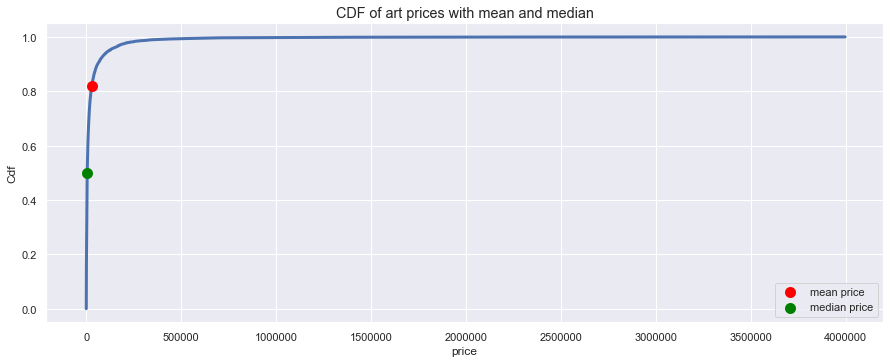

In [8]:
plt.figure(figsize = (15, 5.5))
plt.title("CDF of art prices with mean and median", fontsize = 'x-large')

plt.plot(price_cdf.xs, price_cdf.ps, linewidth=3, zorder=1)
plt.scatter(mean_price, price_cdf.Prob(mean_price), color='red', label='mean price', zorder=2, linewidth=5)
plt.scatter(median_price, price_cdf.Prob(median_price), color='green', label='median price', zorder=2, linewidth=5)

plt.xlabel('price')
plt.ylabel('Cdf')

plt.legend()
plt.show()

**Comment:** We see that the mean is greater than 80% of the prices. However, it's as nothing compared to the record price of $3,998,000. This is the price of the painting Kali by Tyeb Mehta.

### Finding analytic CDF:
From the shapes of the CDF and PMF, we suspect that it's a Pareto distribution. There is a simple visual test that indicates whether an empirical distribution fits a Pareto distribution: on a log-log scale, the CCDF (Complement CDF = 1 - CDF) looks like a straight line.

In [9]:
def Pareto_visual_test(value_series, xmin, alpha, low=0, high=1e7):
    # Visual test for Pareto distribution:
    plt.figure(figsize = (10, 6))

    log_values = np.log(value_series)
    cdf_log = thinkstats2.Cdf(log_values)

    # pareto model plot:
    xs, ys = thinkstats2.RenderParetoCdf(xmin, alpha, low, high)
    thinkplot.Plot(np.log(xs), 1-ys, label='model', color='red')
    
    thinkplot.Cdf(cdf_log, complement=True, label='log-data') 
    thinkplot.Config(xlabel='log data points', ylabel='CCDF', yscale='log')
    
    plt.title('Pareto distribution test, xmin = {}, alpha = {}'.format(xmin, alpha), fontsize='x-large')

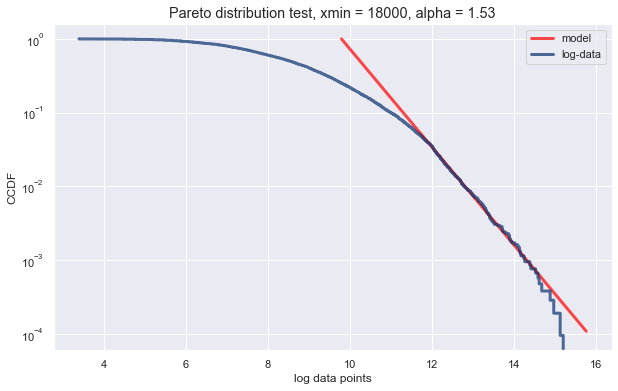

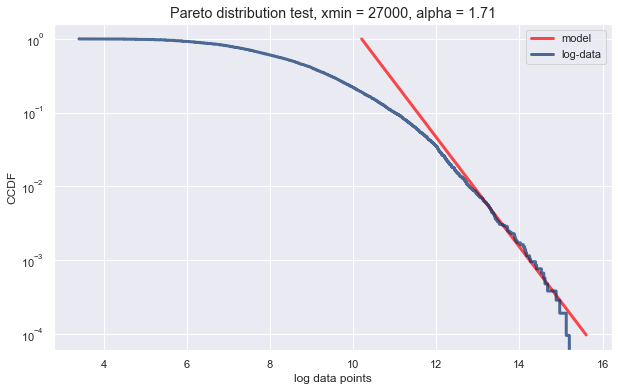

In [10]:
Pareto_visual_test(saffronart_df.winning_bid, xmin=18000, alpha=1.53, high=7e6) # 67.5 : 32.5
Pareto_visual_test(saffronart_df.winning_bid, xmin=27000, alpha=1.71, high=6e6) # 65 : 35

# https://stats.stackexchange.com/questions/88394/how-to-derive-the-alpha-for-the-pareto-rule

**Comment:**
I have provided an estimation of the line that best fits the price distribution (see the upper graph). This line belongs to a Pareto distribution with the smallest possible value $x_m = 18,000$ and the parameter $\alpha = 1.53$. This can be intepreted that **for the prices that are at least $\$18,000$, the top 32.5\% accounts for 67.5% of the total value (sum of all the prices)**. My calculation is based on the formula below from Wikipedia (see [here](https://en.wikipedia.org/wiki/Pareto_distribution)):

> There is some number $0 \leq p \leq \frac{1}{2}$ such that $100p%$ of all people receive $100(1 − p)%$ of all income, and similarly for every real (not necessarily integer) $n > 0$, $100p^n%$ of all people receive $100(1 − p)^n$ percentage of all income. $\alpha$ and $p$ are related by: $$1 - \frac{1}{\alpha} = \frac{ln(1-p^n)}{ln(1-(1-p)^n)}$$
This does not apply only to income, but also to wealth, or to anything else that can be modeled by this distribution.

However, we observe that the line only fits the right tail of the actual distribution well. The lower graph has the two paramters changed to fit the very end of the right tail slightly better. 

A distribution with a similar looking CDF is the lognormal distribution. We apply the Normal Probability Plot to validate this speculation.

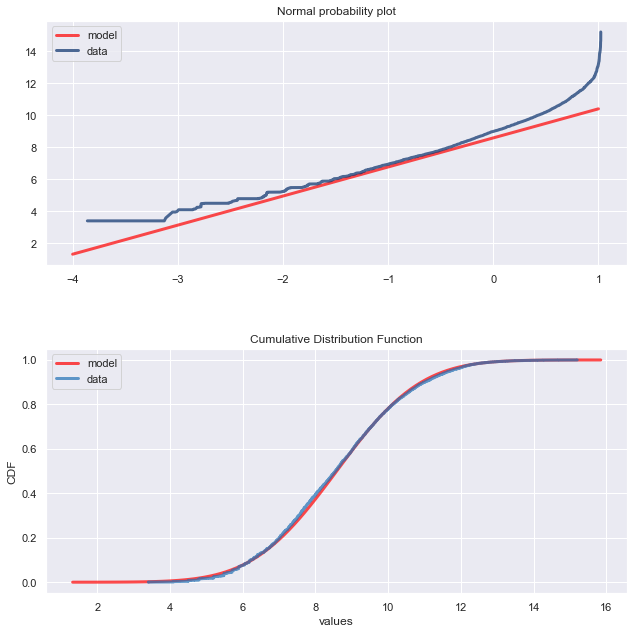

In [11]:
def normal_dist_test(values, normal_prob_x_range=[-3, 3]):
    fig = plt.figure(figsize=(10,10))
    values_cdf = thinkstats2.Cdf(values)

    ###
    # Normal Probability Plot:

    plt.subplot(211)
    
    mean = np.mean(values)
    std = np.std(values)
    
    fxs, fys = thinkstats2.FitLine(normal_prob_x_range, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='red', label='model') 

    xs, ys = thinkstats2.NormalProbability(values) 
    thinkplot.Plot(xs, ys, label = 'data')
    thinkplot.Config(title='Normal probability plot')

    plt.legend()

    ###
    # Compare the Cdf of values with a Normal model:

    plt.subplot(212)
    
    xmin = mean - 4*std
    xmax = mean + 4*std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, low=xmin, high=xmax)
    thinkplot.Plot(xs, ps, label='model', color='red')

    #plt.xlim((3, 6))
    #plt.ylim((0.0, 0.1))
    thinkplot.Cdf(values_cdf, label='data')
    thinkplot.Config(title='Cumulative Distribution Function', xlabel='values', ylabel='CDF')

    plt.legend()

    ###

    fig.tight_layout(pad=5.0)

    plt.show()
    
    
log_price = np.log(saffronart_df.winning_bid)
normal_dist_test(log_price, [-4, 1])

**Comment:**
1. Looking at the Normal Probability Plot, we see that the lognormal distribution seems to be a good estimation, except for the two tails. Again, we can observe the strong effect of outliers on the right tail, which deviates significantly from the lognormal model.
2. The CDF of the log-prices has the the recognizable sigmoid shape of normal distributions and seems to match well with our model. 

Regarding the effect of outliers on the right tail, we can reduce the deviation by taking log another time. We consider the log-lognormal model below:

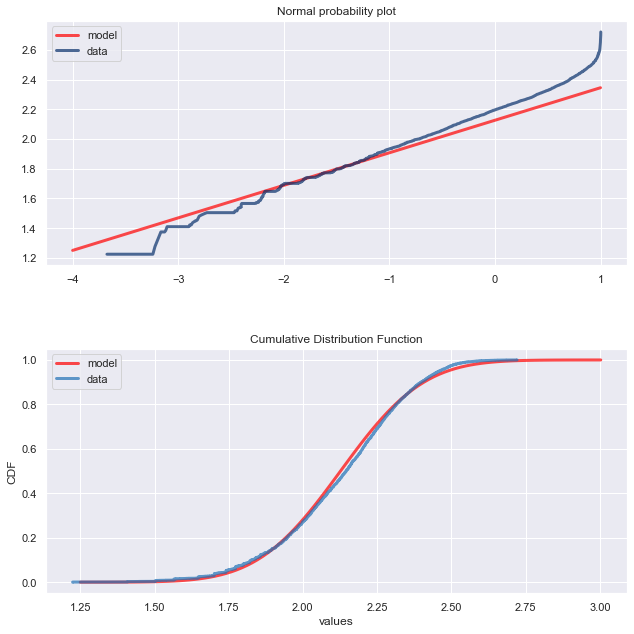

In [12]:
# try a log-lognormal distribution:

loglog_price = np.log(log_price) 
normal_dist_test(loglog_price, [-4, 1])

**Comment:**
It's true that the deviation at the right tail is reduced. However, there's not an overall improvement and there exist more deviations in the CDF.

## Probability Density Function (PDF):

Text(0.5, 0, 'Prices')

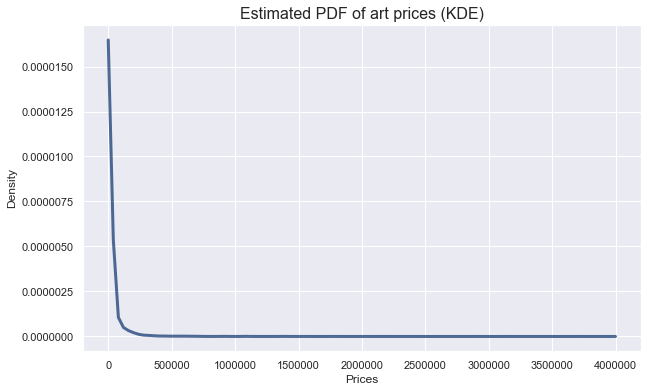

In [13]:
# Estimated PDF using KDE:

def plot_kde(data_series, size=(10, 6)):
    kde_pdf = thinkstats2.EstimatedPdf(data_series.dropna())

    plt.figure(figsize = size)
    thinkplot.Pdf(kde_pdf, label='sample KDE')

    plt.xlabel('Values', fontsize = '12')
    plt.ylabel('Density', fontsize = '12')
    plt.title('Estimated PDF (KDE)', fontsize ='x-large')
    
plot_kde(saffronart_df.winning_bid)
plt.title(label='Estimated PDF of art prices (KDE)', fontsize='16')
plt.xlabel('Prices', fontsize = '12')

**Comment:**
We first try the Kernel Density Estimation (KDE) algorithm to estimate our PDF. This reflects the look of the PMF seen above. (A PDF is a continuous and smooth "version" of the discrete PMF). If this is a lognormal distribution, a PDF like this indicates a large standard deviation (which is true in our case).

Next, we plot the PDF with the mean and median.

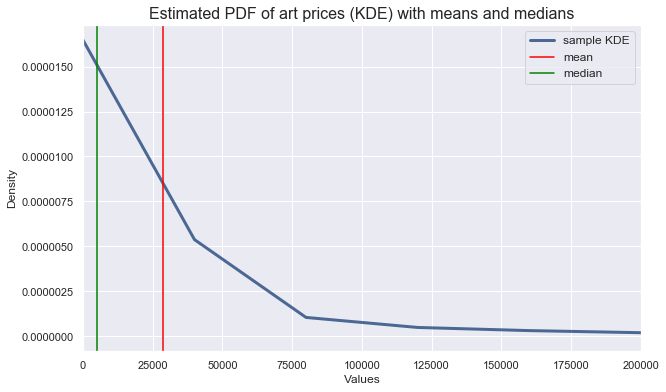

In [14]:
plot_kde(saffronart_df.winning_bid)
plt.title(label='Estimated PDF of art prices (KDE) with means and medians', fontsize='16')

plt.axvline(x=mean_price, label = 'mean', color='red')
plt.axvline(x=median_price, label = 'median', color='green')

plt.xlim((0, 200000))
plt.legend(fontsize='12')

**Comment:**
Because the range is too vast, I have it narrowed down to prices less than $\$200,000$ to make my point clearer. However, the  general shape of the distribution is still reflected in the graph above.

As noted before and seen in the graph above, the mean is greater than the median and this indicates that the distribution skews right (which is also visually apparent). We have the skewness of this distribution calculated below:

In [15]:
# Skewness:

from scipy.stats import moment

central_moment3 = moment(saffronart_df.winning_bid.dropna(), moment=3)

sample_skewness = central_moment3/(price_std**3)
print('Sample skewness:', sample_skewness)

Pearson_skewness = 3*(mean_price - median_price)/price_std 
print('Pearson skewness:', Pearson_skewness)

Sample skewness: 16.636899012570257
Pearson skewness: 0.6178264220090403


**Comment:**
I've provided two methods of computing skewness: Sample and Pearson skewness. Both return positive results, which confirm our observation that the distribution is right skewed. However, the magnitudes of the two results are different. This is because outliers often have a disproportionate effect on Sample skewness while Pearson method is more robust and less vulnerable to extreme values. The big difference between the two results again shows us the influence of outliers and extremely high prices.

Next, we compare the estimated PDF by the KDE algorithm with a lognormal model's PDF.

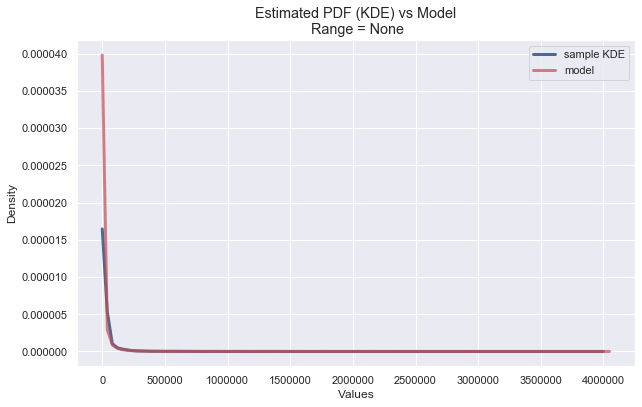

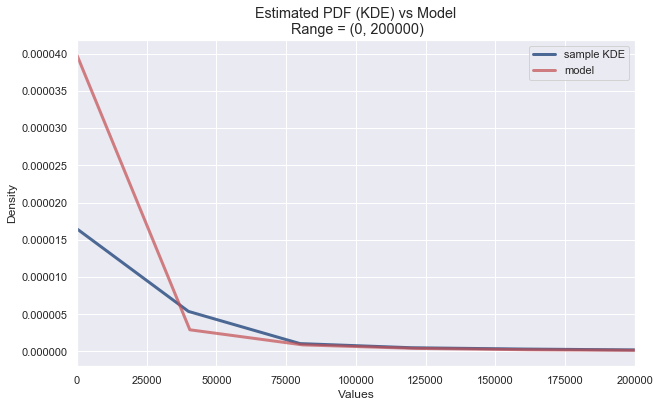

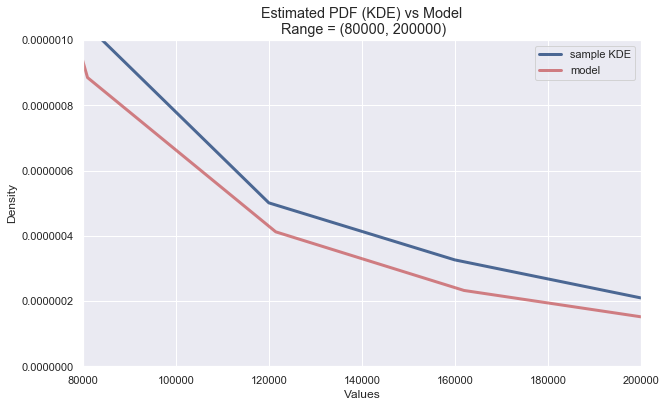

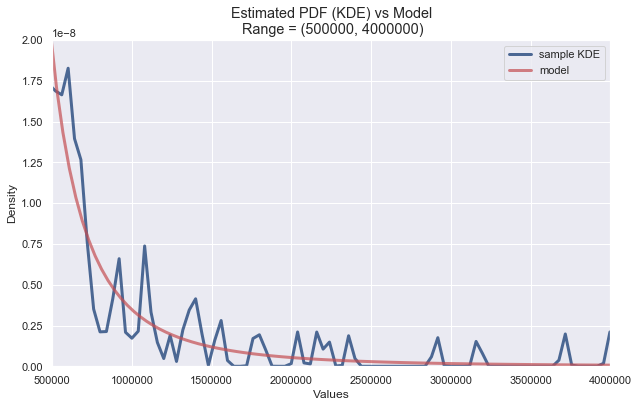

In [16]:
# KDE vs Lognormal Model PDF:

# Lognormal Model PDF:
from scipy.stats import lognorm

class LogNormalPdf(thinkstats2.Pdf): 
    def __init__(self, log_sigma, log_mu, label=''): 
        self.log_sigma = log_sigma 
        self.log_mu = log_mu
        self.label = label 
    
    def Density(self, xs): 
        return scipy.stats.lognorm.pdf(xs, s=self.log_sigma, scale=np.exp(self.log_mu)) 
    
    def GetLinspace(self): 
        low, high = np.exp(self.log_mu-3.65*self.log_sigma), np.exp(self.log_mu+3.65*self.log_sigma) 
        return np.linspace(low, high, 101)

def plot_kde_vs_model(data_series, model_pdf, xlim=None, ylim=None):
    # Plot KDE:
    plot_kde(data_series, size=(10,6))

    plt.xlabel('Values', fontsize = '12')
    plt.ylabel('Density', fontsize = '12')
    plt.title('Estimated PDF (KDE) vs Model\n Range = {}'.format(xlim), fontsize ='x-large')
    
    # Plot Model:
    thinkplot.Pdf(model_pdf, label='model', color='r')
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    plt.legend()
    

log_price = np.log(saffronart_df.winning_bid)
price_model_pdf = LogNormalPdf(log_price.std(), log_price.mean())

plot_kde_vs_model(saffronart_df.winning_bid, price_model_pdf)
plot_kde_vs_model(saffronart_df.winning_bid, price_model_pdf, xlim=(0, 200000))
plot_kde_vs_model(saffronart_df.winning_bid, price_model_pdf, xlim=(80000, 200000), ylim=(0, 1e-6))
plot_kde_vs_model(saffronart_df.winning_bid, price_model_pdf, xlim=(500000, 4000000), ylim=(0, 2e-8))

**Comment**:
At first, it seems that there's a big difference between the KDE and the lognormal model for values near 0 but they seem to match well with each other on the rest of the inteval. However, as we zoom in on smaller ranges, we discover new insights:
* On the first range of prices below $\$200,000$, the lognormal model suggests there should be more prices less than $\$37,500$ (between $\$25,000$ and $\$50,000$) and less prices between $\$37,500$ and $\$75,000$.
* The two lines seem to match well for prices greater than $\$80,000$. However, as we zoom in on this interval, the KDE is above the lognormal model. In other words, there should be more prices on this interval than what indicated by the model.
* The last graph shows us the range between $\$500,000$ and $\$4,000,000$. This interval seems to have more values than the lognormal model's prediction, especially for prices greater than 2 million dollars.

**CONCLUSION:**

The lognormal model captures the shape of the distribution well. However, it suggests that there should be more lower prices. Another thing that shows up consistently in our analysis is the strong presence of outliers, which makes it harder to find a model that fits all data points. It can be said that the extremely high prices are an important aspect of the price distribution.

***

# Distribution of artists' ages
## Histogram:

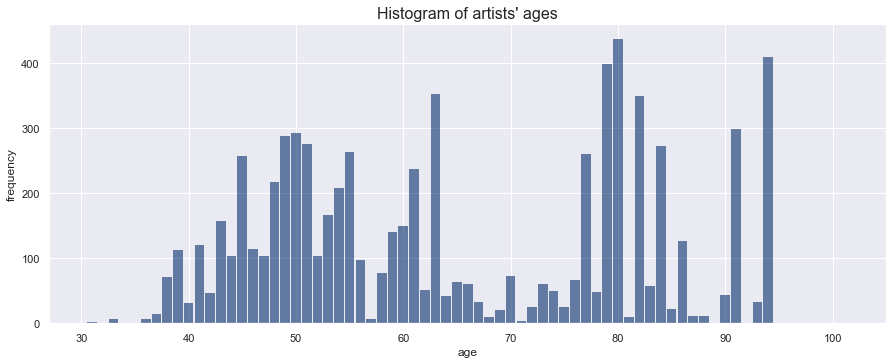

<Figure size 576x432 with 0 Axes>

In [17]:
alive_artists = saffronart_df[saffronart_df.death_date.isna()]

age_hist = thinkstats2.Hist(alive_artists.artist_age)

plt.figure(figsize = (15, 5.5))
plt.title("Histogram of artists' ages", fontsize=16)

thinkplot.Hist(age_hist)
thinkplot.Show(xlabel='age', ylabel='frequency') 

## Probability Mass Function (PMF):

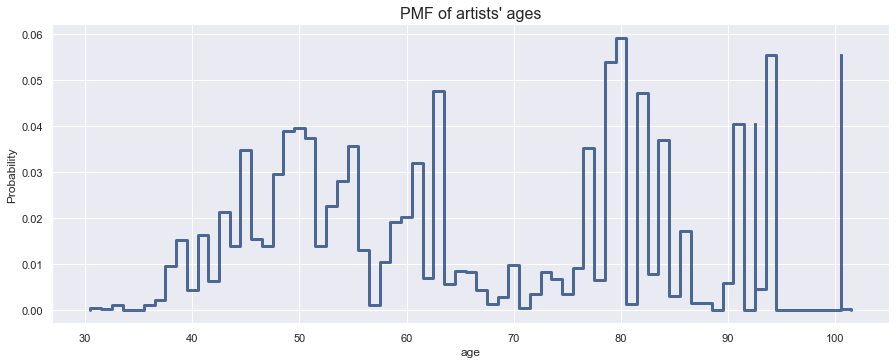

<Figure size 576x432 with 0 Axes>

In [18]:
age_pmf = thinkstats2.Pmf(alive_artists.artist_age)

plt.figure(figsize = (15, 5.5))
plt.title("PMF of artists' ages", fontsize=16)

thinkplot.Pmf(age_pmf)
thinkplot.Show(xlabel='age', ylabel='Probability') 

## Cumulative Distribution Function (CDF):

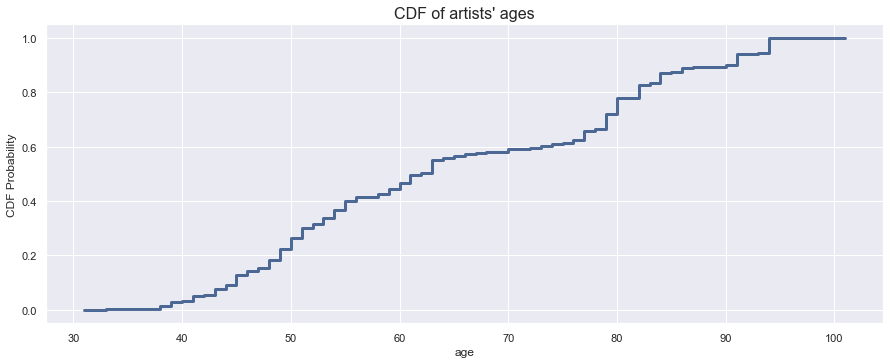

<Figure size 576x432 with 0 Axes>

In [19]:
age_cdf = thinkstats2.Cdf(alive_artists.artist_age)

plt.figure(figsize = (15, 5.5))
plt.title("CDF of artists' ages", fontsize=16)

thinkplot.Cdf(age_cdf)
thinkplot.Show(xlabel='age', ylabel='CDF Probability') 

## Probability Density Function (PDF):

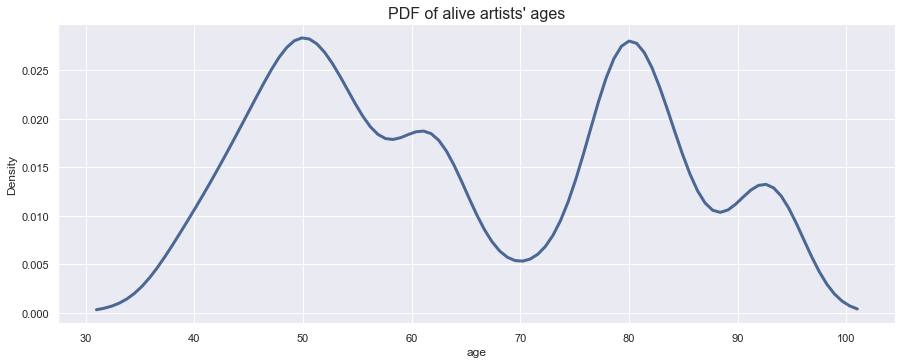

<Figure size 576x432 with 0 Axes>

In [21]:
age_pdf = thinkstats2.EstimatedPdf(alive_artists.artist_age.dropna())

plt.figure(figsize = (15, 5.5))
plt.title("PDF of alive artists' ages", fontsize=16)

thinkplot.Pdf(age_pdf)
thinkplot.Show(xlabel='age', ylabel='Density')